In [110]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [103]:
root = Path("runs") 
file = "Inference_summary.csv"
df = pd.read_csv(root/file)
cols = ['Inference', 'Latency', 'FPS', 'weights', 'source', 'img_size', 'conf_thres', 'iou_thres', 'project', 'Module']
df["project"] = df.project.str.replace("runs/",'').str.capitalize()
df[cols]

,Inference,Latency,FPS,weights,source,img_size,conf_thres,iou_thres,project,Module
0,113.34,145.19,7.04,yolov7-w6-pose.pt,inference/people,1280,0.05,0.65,Pose,NVIDIA Jetson AGX Xavier (32 GB ram)
1,378.69,447.93,2.28,yolov7-w6-pose.pt,inference/people,2560,0.05,0.45,Pose,NVIDIA Jetson AGX Xavier (32 GB ram)
2,112.78,140.75,7.22,yolov7-w6-pose.pt,inference/people,1280,0.05,0.45,Pose,NVIDIA Jetson AGX Xavier (32 GB ram)
3,113.84,134.07,7.56,yolov7-w6-pose.pt,inference/people,1280,0.45,0.45,Pose,NVIDIA Jetson AGX Xavier (32 GB ram)
4,72.36,94.26,10.77,yolov7-w6-pose.pt,inference/people,960,0.05,0.45,Pose,NVIDIA Jetson AGX Xavier (32 GB ram)
5,220.57,264.15,3.86,yolov7-w6-pose.pt,inference/people,1920,0.05,0.45,Pose,NVIDIA Jetson AGX Xavier (32 GB ram)
6,50.26,74.60,14.78,yolov7.pt,inference/people,640,0.15,0.45,Detect,NVIDIA Jetson AGX Xavier (32 GB ram)
7,105.95,153.71,7.14,yolov7.pt,inference/people,1280,0.15,0.45,Detect,NVIDIA Jetson AGX Xavier (32 GB ram)
8,377.14,419.76,2.43,yolov7.pt,inference/people,2560,0.15,0.45,Detect,NVIDIA Jetson AGX Xavier (32 GB ram)
9,98.37,115.83,8.72,yolov7-e6e.pt,inference/people,640,0.15,0.45,Detect,NVIDIA Jetson AGX Xavier (32 GB ram)


In [173]:
df_AGX_Xavier = (df[cols].pivot_table(values=['FPS'], 
                       index=['project', 'weights'], columns=['Module', 'img_size'], 
                       aggfunc=np.mean)
                 .rename(columns={"NVIDIA Jetson AGX Xavier (32 GB ram)": "AGX Xavier"})
                 .round(1)
                 )

df_AGX_Xavier.columns = df_AGX_Xavier.columns.droplevel(None)

df_AGX_Xavier

Module                    AGX Xavier                     
img_size                        640   960  1280 1920 2560
project weights                                          
Detect  yolov7-e6e.pt            8.7   NaN  4.3  NaN  1.4
        yolov7.pt               14.8   NaN  7.1  NaN  2.4
Pose    yolov7-w6-pose.pt       13.4  10.8  7.3  3.9  2.3

In [181]:
def highlight_greater_than_30(val):
    if val >= 30:
        return 'background-color: yellow; font-weight: bold; color: black'
    else:
        return ''
    
df_AGX_Orin = ((df_AGX_Xavier * 7).rename(columns={"AGX Xavier": "AGX Orin"}))

df_compare = pd.concat([df_AGX_Xavier, df_AGX_Orin], axis=1 )
df_compare.style.applymap(highlight_greater_than_30).format(precision=1)
# df_AGX_Orin.style.applymap(highlight_greater_than_30).set_precision(1)

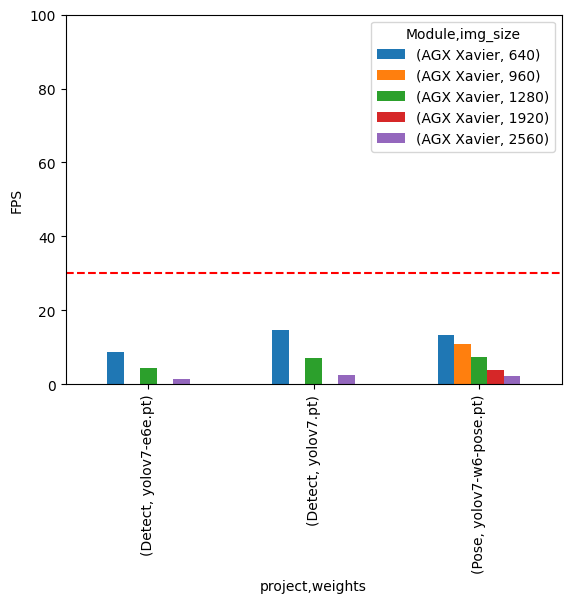

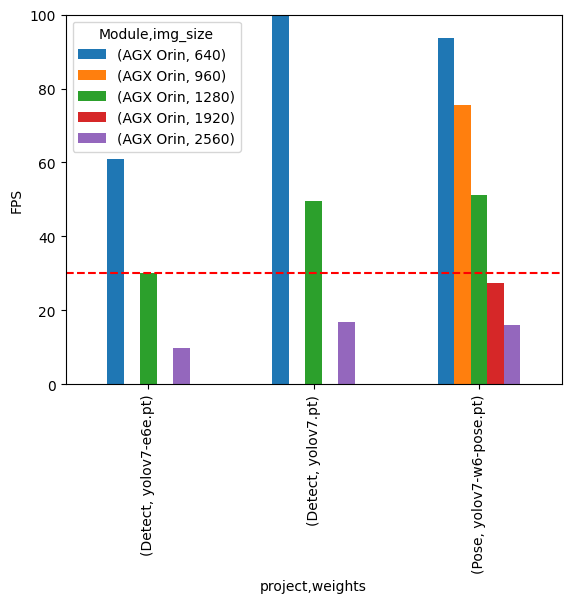

In [177]:
df_AGX_Xavier.plot.bar(ylabel="FPS", ylim=(0,100))
plt.axhline(y=30, linestyle='--', color='red')

df_AGX_Orin.plot.bar(ylabel="FPS", ylim=(0,100))
plt.axhline(y=30, linestyle='--', color='red')